In [ ]:
# simple CNN for the MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# id array, without extracting any features, take whole image and covert to 1 dimension

In [14]:
# load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [15]:
# x_train training set with 60000 images
# x_test test set 10000 images
# y_train training set labels for training images
# y_test test set image lables

y_train[545]

8

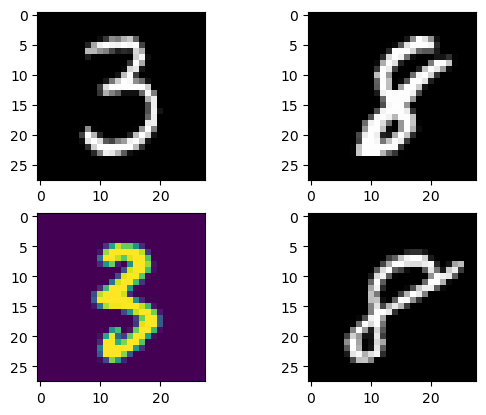

In [5]:
# plot 4 images as gray scale

plt.subplot(221)
plt.imshow(x_train[50], cmap = 'gray')
plt.subplot(222)
plt.imshow(x_train[545], cmap = 'gray')
plt.subplot(223)
plt.imshow(x_train[45000])  # without color map
plt.subplot(224)
plt.imshow(x_train[59999], cmap = plt.get_cmap('gray'))
plt.show()

In [6]:
y_train[545]

8

In [7]:
x_train.shape

(60000, 28, 28)

# Preprocessing step

In [23]:
# normalize inputs from 0.255 to 0.1
x_train = x_train / 255
x_test = x_test / 255

In [24]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [25]:
y_train = to_categorical(y_train)  # converting to categories
y_test = to_categorical(y_test)

In [26]:
print(y_train[20])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Model building

In [27]:
# create the object using sequential
# add input layer, add hidden layer, add the output layer
# choose the suitable activation function 
# add optimizer and matrices

In [28]:
cnn_Digit_model = Sequential()
cnn_Digit_model.add(Convolution2D(16, kernel_size=(3,3), input_shape=(28,28,1), activation='relu')) # conv layer,

# conv layer, 16 no of filter, 3,3 filter size
cnn_Digit_model.add(MaxPooling2D(pool_size = (2,2))) # maxpool layer
cnn_Digit_model.add(Flatten()) # flatten layer
cnn_Digit_model.add(Dense(units = 128, activation='relu')) # output layer
cnn_Digit_model.add(Dense(units = 10, activation='softmax'))
# compile model

cnn_Digit_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# since no. of classes more than 2 we use categorical crossentropy function for loss measurement
# adam: error minimizer(optimizer)
# accuracy,try to achieve better accuracy

cnn_Digit_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               346240    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347690 (1.33 MB)
Trainable params: 347690 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
cnn_Digit_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5, batch_size = 200)

Epoch 1/5
300/300 [==============================] - 23s 57ms/step - loss: 0.2971 - accuracy: 0.9200 - val_loss: 0.1170 - val_accuracy: 0.9666
Epoch 2/5
300/300 [==============================] - 17s 55ms/step - loss: 0.0921 - accuracy: 0.9739 - val_loss: 0.0747 - val_accuracy: 0.9762
Epoch 3/5
300/300 [==============================] - 15s 50ms/step - loss: 0.0627 - accuracy: 0.9816 - val_loss: 0.0591 - val_accuracy: 0.9802
Epoch 4/5
300/300 [==============================] - 15s 49ms/step - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0484 - val_accuracy: 0.9839
Epoch 5/5
300/300 [==============================] - 15s 49ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.0435 - val_accuracy: 0.9845


In [31]:
scores = cnn_Digit_model.evaluate(x_test, y_test) # test result
scores

313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9845


[0.0434543639421463, 0.984499990940094]

In [32]:
print('loss =', scores[0], 'accuracy =', scores[1])

loss = 0.0434543639421463 accuracy = 0.984499990940094


1/1 [==============================] - 0s 26ms/step


array([[3.5715583e-04, 9.9848241e-01, 1.7473711e-04, 1.0236795e-06,
        2.4854936e-04, 1.0893577e-05, 7.9001969e-05, 1.5777227e-04,
        4.8681218e-04, 1.6335902e-06]], dtype=float32)

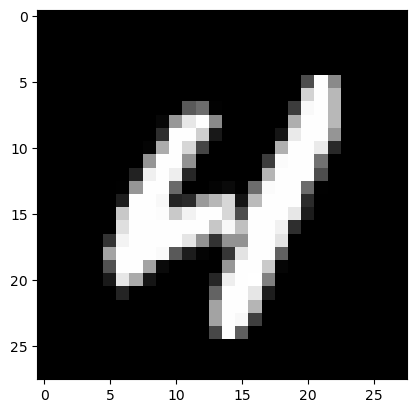

In [35]:
# single image test, select any image from test data
plt.imshow(x_test[770], cmap = plt.get_cmap('gray'))
r1 = cnn_Digit_model.predict(x_test[7000:7001])
r1

In [38]:
r3=np.argmax(r1,axis=1) # get the location of maximum probability and location will be desired result
print(r3)

[1]


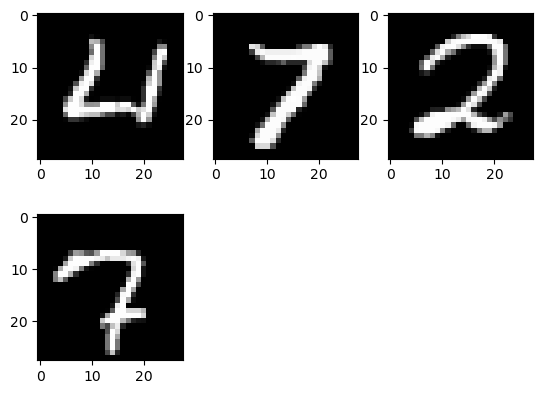

In [40]:
# plot 4 images as gray scale
plt.subplot(231)
plt.imshow(x_test[33], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(x_test[34], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(x_test[35], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(x_test[36], cmap=plt.get_cmap('gray'))
#plt.subplot(235)
#plt.imshow(X_test[4], cmap=plt.get_cmap('gray'))
#plt.subplot(236)
#plt.imshow(X_test[5], cmap=plt.get_cmap('gray'))

In [41]:
r3=np.argmax(r1,axis=1) # get the location of maximum probability and location will be desired result
print(r3)

[1]
